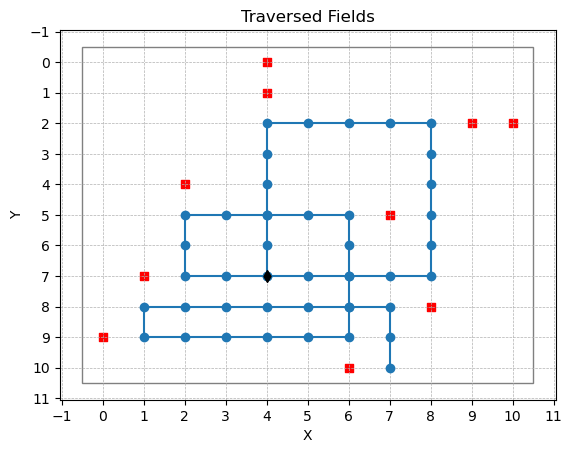

Part 1: 41


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

with open("test.txt", "r") as file:
    dmap = [[char for char in line if not char == "\n"] for line in file.readlines()]


Directions = {
        0: np.array([0, -1]), # Up
        1: np.array([1, 0]), # Left
        2: np.array([0, 1]), # Down
        3: np.array([-1, 0])} # Right

class Guard:
    def __init__(self, xi, yi, direction: int):
        self.pos = np.array([xi, yi])
        self.direction = direction
    
    def __repr__(self):
        return f"Guard on [{self.pos}], Facing {Directions[self.direction]}"
    
    def move(self):
        self.pos += Directions[self.direction]
        return self.pos

    def rotate(self, counterclockwise = False):
        if counterclockwise:
            self.direction -= 1
        else:
            self.direction += 1
            
        if self.direction == 4:
            self.direction = 0
        if self.direction == -1:
            self.direction = 3
        return self.direction

    def checkValidMove(self, pos_indexes, mapshape):
        """Returns:
            1 if guard can move forward
            0 if guard cant move forwad
            -1 if guard left the area
        """
        propsedPos = self.pos + Directions[self.direction]
        # print(propsedPos, "=?=", obstacle_indexes)
        px, py = propsedPos
        
        # 1. check if guard is out of bounds
        if not (px >= 0 and py >= 0 and px < mapshape[0] and py < mapshape[1]):
            return -1
        # 1. check if guard is in front of obstacle
        elif np.any(np.all(propsedPos == pos_indexes, axis=1)):
            return 0
        # 2. Guard can move forwad
        else:
            return 1


obstacle_indexes = np.array([])
guard = None
for y, row in enumerate(dmap):
    for x, field in enumerate(row):
        if field == "#":
            if obstacle_indexes.size == 0:
                obstacle_indexes = np.array([x, y])
            else:
                obstacle_indexes = np.vstack([obstacle_indexes, [x, y]])
        if field == "^":
            guard = Guard(x, y, 0)



TraversedEdges = np.array([guard.pos])
while True:
    movestatus = guard.checkValidMove(obstacle_indexes, np.array(dmap).shape)
    if movestatus == 0:
        guard.rotate()
    if movestatus == -1:
        break

    m = guard.move()
    TraversedEdges = np.vstack([TraversedEdges, m]) if TraversedEdges.size else np.array([m])



plt.scatter(np.transpose(obstacle_indexes)[0], np.transpose(obstacle_indexes)[1], marker='s', color="r")
plt.scatter(TraversedEdges[0][0], TraversedEdges[0][1], color="black", zorder=5, marker="d")

plt.plot(TraversedEdges[:, 0], TraversedEdges[:, 1], marker='o')
plt.title('Traversed Fields')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), len(dmap[0]), len(dmap), fill=None, edgecolor='gray', linewidth=1))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().invert_yaxis()
plt.show()

print("Part 1:", len(np.unique(TraversedEdges, axis=0)))


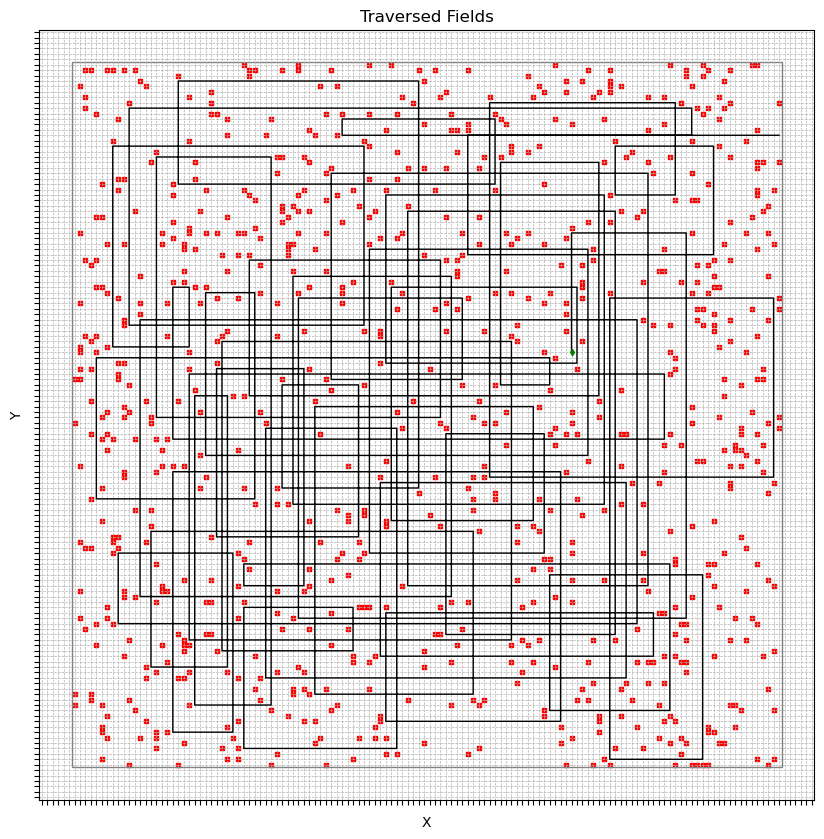

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(np.transpose(obstacle_indexes)[0], np.transpose(obstacle_indexes)[1], marker='s', color="r", s=5)
plt.scatter(TraversedEdges[0][0], TraversedEdges[0][1], color="green", zorder=5, marker="d", s=10)

plt.plot(TraversedEdges[:, 0], TraversedEdges[:, 1], markersize=2, color = "black", linewidth=1)
plt.title('Traversed Fields')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), len(dmap[0]), len(dmap), fill=None, edgecolor='gray', linewidth=1))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().invert_yaxis()
plt.show()

# Time to optimise yeeeey!
`Above code runs in 18 seconds which is unacceptable!`

Instead of moving over each tile, I can compute which obstacle guard is going to hit next->
1. Look at guards direction
2. FInd all obstacles, that are in same direction [eg, direction `(0, 1)` -> search all obstacles with `y` greater than guards y]
3. For all those obstacles, find the one with smallest distance from guard

You now move guard to location one smaller of obstacle in that direction

[91 30]
[113  31]
[112 103]
[ 40 102]
[41 42]
[72 43]
[71 59]
[46 58]
[47 19]
[106  20]
[105  97]
[60 96]
[61 26]
[100  27]
[ 99 106]
[ 67 105]
[68 67]
[87 68]
[86 91]
[53 90]
[54 33]
[95 34]
[94 73]
[23 72]
[24 41]
[34 42]
[33 81]
[ 3 80]
[ 4 53]
[88 54]
[87 60]
[77 59]
[78 17]
[97 18]
[96 62]
[31 61]
[32 35]
[68 36]
[67 66]
[14 65]
[15 16]
[37 17]
[ 36 119]
[ 21 118]
[22 60]
[29 61]
[ 28 112]
[ 13 111]
[14 85]
[74 86]
[ 73 117]
[ 43 116]
[44 62]
[85 63]
[84 85]
[57 84]
[58 40]
[93 41]
[92 56]
[56 55]
[57 23]
[98 24]
[97 82]
[39 81]
[40 38]
[70 39]
[69 99]
[11 98]
[12 46]
[104  47]
[103 104]
[  7 103]
[ 8 89]
[30 90]
[ 29 124]
[ 17 123]
[18 74]
[90 75]
[ 89 122]
[ 56 121]
[ 57 100]
[107 101]
[106 110]
[ 55 109]
[56 76]
[102  77]
[101 114]
[ 34 113]
[35 66]
[60 67]
[ 59 127]
[ 30 126]
[31 99]
[ 52 100]
[ 51 109]
[ 26 108]
[27 50]
[81 51]
[ 80 107]
[ 20 106]
[21 56]
[109  57]
[108  70]
[17 69]
[18 40]
[22 41]
[21 53]
[ 6 52]
[ 7 14]
[54 15]
[53 49]
[ 9 48]
[10  7]
[114   8]
[113  14]
[4

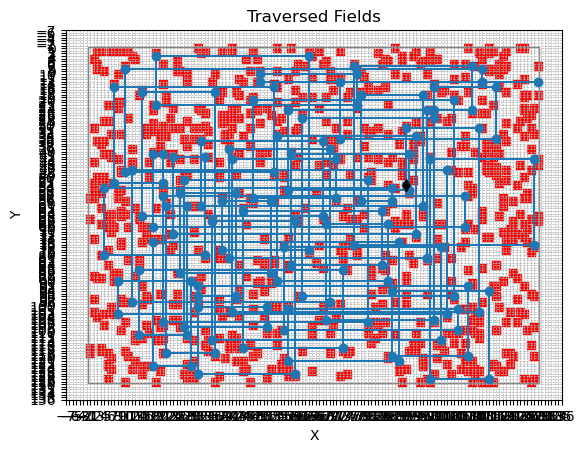

Part 1: 155


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

with open("input.txt", "r") as file:
    dmap = [[char for char in line if not char == "\n"] for line in file.readlines()]


Directions = {
        0: np.array([0, -1]), # Up
        1: np.array([1, 0]), # Left
        2: np.array([0, 1]), # Down
        3: np.array([-1, 0])} # Right

class Guard:
    def __init__(self, xi, yi, direction: int):
        self.pos = np.array([xi, yi])
        self.direction = direction
    
    def __repr__(self):
        return f"Guard on [{self.pos}], Facing {Directions[self.direction]}"
    
    def move(self):
        self.pos += Directions[self.direction]
        return self.pos

    def rotate(self, counterclockwise = False):
        if counterclockwise:
            self.direction -= 1
        else:
            self.direction += 1
            
        if self.direction == 4:
            self.direction = 0
        if self.direction == -1:
            self.direction = 3
        return self.direction

    def checkValidMove(self, pos_indexes, mapshape):
        """Returns:
            1 if guard can move forward
            0 if guard cant move forwad
            -1 if guard left the area
        """
        propsedPos = self.pos + Directions[self.direction]
        # print(propsedPos, "=?=", obstacle_indexes)
        px, py = propsedPos
        
        # 1. check if guard is out of bounds
        if not (px >= 0 and py >= 0 and px < mapshape[0] and py < mapshape[1]):
            return -1
        # 1. check if guard is in front of obstacle
        elif np.any(np.all(propsedPos == pos_indexes, axis=1)):
            return 0
        # 2. Guard can move forwad
        else:
            return 1
        
    def GetNextObstacle(self, Obstacles, mapshape):
        """Returns: 
        - next spot guard can move to 
        - None if guard goes out of map
        """
        # 1. Look at guards direction
        # 2. FInd all obstacles, that are in same direction [eg, direction `(0, 1)` -> search all obstacles with `y` greater than guards y] but on same x coordinate
        # 3. For all those obstacles, find the one with smallest distance from guard
        
        relevant_obstacles = np.array([])
        obstacle = np.array([])

        if self.direction == 0:  # Up # take obstacle with biggest y
            relevant_obstacles = Obstacles[(Obstacles[:, 1] < self.pos[1]) & (Obstacles[:, 0] == self.pos[0])]
            if relevant_obstacles.size > 0: # Check is required so we can return non-empty array
                obstacle =  np.array(relevant_obstacles[np.argmax(relevant_obstacles[:, 1])])
            
        elif self.direction == 1:  # Left # Take smallest x
            relevant_obstacles = Obstacles[(Obstacles[:, 0] > self.pos[0]) & (Obstacles[:, 1] == self.pos[1])]
            if relevant_obstacles.size > 0:
                obstacle =  np.array(relevant_obstacles[np.argmin(relevant_obstacles[:, 0])])
            
        elif self.direction == 2:  # Down
            relevant_obstacles = Obstacles[(Obstacles[:, 1] > self.pos[1]) & (Obstacles[:, 0] == self.pos[0])]
            if relevant_obstacles.size > 0:
                obstacle =  np.array(relevant_obstacles[np.argmin(relevant_obstacles[:, 1])])
            
        elif self.direction == 3:  # Right
            relevant_obstacles = Obstacles[(Obstacles[:, 0] < self.pos[0]) & (Obstacles[:, 1] == self.pos[1])]
            if relevant_obstacles.size > 0:
                obstacle =  np.array(relevant_obstacles[np.argmax(relevant_obstacles[:, 0])])

        if obstacle.size> 0:
            print(obstacle)
            return np.array(obstacle) - Directions[guard.direction], False
        
        # GUARD GOES OUT OF AREA
        if relevant_obstacles.size == 0:
            # Okay so, if he goes out of map, he goes to max or min value in that direction
            x, y = self.pos
            if self.direction == 0: #UP
                return [x, 0], True 
            if self.direction == 1: #Left
                return [mapshape[0]-1, y], True 
            if self.direction == 2: #Down
                return [x, mapshape[1]-1], True 
            if self.direction == 3: #Right
                return [0, y], True 


obstacle_indexes = np.array([])
guard = None
for y, row in enumerate(dmap):
    for x, field in enumerate(row):
        if field == "#":
            if obstacle_indexes.size == 0:
                obstacle_indexes = np.array([x, y])
            else:
                obstacle_indexes = np.vstack([obstacle_indexes, [x, y]])
        if field == "^":
            guard = Guard(x, y, 0)



TraversedEdges = np.array([guard.pos])

while True:    
    next_pos, end = guard.GetNextObstacle(obstacle_indexes, np.array(dmap).shape)
    
    guard.pos = next_pos
    
    TraversedEdges = np.vstack([TraversedEdges, guard.pos]) if TraversedEdges.size else np.array([m])
    guard.rotate()
    
    if end:
        break







plt.scatter(np.transpose(obstacle_indexes)[0], np.transpose(obstacle_indexes)[1], marker='s', color="r")
plt.scatter(TraversedEdges[0][0], TraversedEdges[0][1], color="black", zorder=5, marker="d")

plt.plot(TraversedEdges[:, 0], TraversedEdges[:, 1], marker='o')
plt.title('Traversed Fields')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), len(dmap[0]), len(dmap), fill=None, edgecolor='gray', linewidth=1))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().invert_yaxis()
plt.show()

print("Part 1:", len(np.unique(TraversedEdges, axis=0)))
